In [ ]:
%run StoreTweetsBackend.ipynb
# import random
# from datetime import timedelta, datetime
# import pandas as pd
# import numpy
import os
import time
import warnings
import numpy as np
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from keras.activations import *
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
stockData= pd.read_csv("project/archive/Stocks/tsla.us.txt",parse_dates=[0])
# cols = [ "Date","Open","High","Low","Close","Volume","OpenInt"]
stockData = stockData.sort_values('Date')
print("Null Values Summary:\n",stockData.isnull().sum(),"\n------")
stockData = stockData.set_index(pd.DatetimeIndex(stockData['Date']))
#cols = [ "Date","Open","High","Low","Close","Volume","OpenInt"]
stockData.drop(columns=['Date'], inplace=True)
# missing,total=findMissingValues(stockData)
# print("Missing values",total)
# nonEmpty=checkNonEmptyRuns(stockData)
# plotDataFrame(stockData,dim=(20,10))
# xs,ys=np.array(dataSquencer(stockData,2,1))
# xs[0]
xxxx,yyyy=sequenceBreak(stockData["Close"].to_numpy(),5,1)
xxxx,yyyy=np.array(xxxx),np.array(yyyy)

Null Values Summary:
 Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64 
------


In [3]:
# ss=stockData.pct_change(periods=1)#change in percentages
change=(stockData-stockData.shift(1))#
# cc=change.apply(lambda x: x>0) 
# lambda x: x > 0 and 'increasing' or 'decreasing'
change.drop(columns=['OpenInt'], inplace=True)
change.dropna(inplace=True)
# stockData.fillna(0, inplace=True)
# (change==change["Volume"].iloc[0]).sum()
# (change["Volume"]==(-change["Volume"].iloc[0])).sum()
# cc.describe()
#1 HotEncode

onValue="Close"
change["Increasing"]=change[onValue].apply(lambda x: x>0 and 1 or 0)
change["Decreasing"]=change[onValue].apply(lambda x: x<0 and 1 or 0)
print("Neutral: ",(change["Decreasing"]==change["Increasing"]).sum(),
      "\tIncreasing: ",change["Increasing"].sum(),"\tDecreasing: ",change["Decreasing"].sum())
stockData[["Increasing","Decreasing"]]=change[["Increasing","Decreasing"]]
stockData["difference"]=(stockData["Increasing"]-stockData["Decreasing"]).shift(-1)
print("na--------:\n ",(stockData.isna().sum() ),"\n----------")
stockData=stockData.replace(np.nan, 0)
stockData[stockData.isna().any(axis=1)]

Neutral:  11 	Increasing:  954 	Decreasing:  892
na--------:
  Open          0
High          0
Low           0
Close         0
Volume        0
OpenInt       0
Increasing    1
Decreasing    1
difference    1
dtype: int64 
----------


,Open,High,Low,Close,Volume,OpenInt,Increasing,Decreasing,difference
Date,,,,,,,,,


In [4]:
xxxx,yyyy=sequenceBreak(stockData["Close"].values,5,0)
xxxx=np.array(xxxx[:-1])
yyyy=np.array(stockData["Close"].shift(-5).values[:-5])
for i in range(len(xxxx)-1):
    print(xxxx[i],stockData["difference"].iloc[i+4],"-",yyyy[i])
    print(xxxx[i],yyyy[i])
print(xxxx.shape,'===',yyyy.shape)


[17.   23.89 23.83 21.96 19.2 ] -1.0 - 16.11
[17.   23.89 23.83 21.96 19.2 ] 16.11
[23.89 23.83 21.96 19.2  16.11] -1.0 - 15.8
[23.89 23.83 21.96 19.2  16.11] 15.8
[23.83 21.96 19.2  16.11 15.8 ] 1.0 - 17.46
[23.83 21.96 19.2  16.11 15.8 ] 17.46
[21.96 19.2  16.11 15.8  17.46] -1.0 - 17.4
[21.96 19.2  16.11 15.8  17.46] 17.4
[19.2  16.11 15.8  17.46 17.4 ] -1.0 - 17.05
[19.2  16.11 15.8  17.46 17.4 ] 17.05
[16.11 15.8  17.46 17.4  17.05] 1.0 - 18.14
[16.11 15.8  17.46 17.4  17.05] 18.14
[15.8  17.46 17.4  17.05 18.14] 1.0 - 19.84
[15.8  17.46 17.4  17.05 18.14] 19.84
[17.46 17.4  17.05 18.14 19.84] 1.0 - 19.89
[17.46 17.4  17.05 18.14 19.84] 19.89
[17.4  17.05 18.14 19.84 19.89] 1.0 - 20.64
[17.4  17.05 18.14 19.84 19.89] 20.64
[17.05 18.14 19.84 19.89 20.64] 1.0 - 21.91
[17.05 18.14 19.84 19.89 20.64] 21.91
[18.14 19.84 19.89 20.64 21.91] -1.0 - 20.3
[18.14 19.84 19.89 20.64 21.91] 20.3
[19.84 19.89 20.64 21.91 20.3 ] -1.0 - 20.22
[19.84 19.89 20.64 21.91 20.3 ] 20.22
[19.89 20.64 21.

[21.87 21.83 22.53 23.61 23.89] 1.0 - 23.94
[21.87 21.83 22.53 23.61 23.89] 23.94
[21.83 22.53 23.61 23.89 23.94] 1.0 - 24.02
[21.83 22.53 23.61 23.89 23.94] 24.02
[22.53 23.61 23.89 23.94 24.02] 1.0 - 24.36
[22.53 23.61 23.89 23.94 24.02] 24.36
[23.61 23.89 23.94 24.02 24.36] 1.0 - 24.95
[23.61 23.89 23.94 24.02 24.36] 24.95
[23.89 23.94 24.02 24.36 24.95] -1.0 - 24.94
[23.89 23.94 24.02 24.36 24.95] 24.94
[23.94 24.02 24.36 24.95 24.94] -1.0 - 24.66
[23.94 24.02 24.36 24.95 24.94] 24.66
[24.02 24.36 24.95 24.94 24.66] 1.0 - 24.72
[24.02 24.36 24.95 24.94 24.66] 24.72
[24.36 24.95 24.94 24.66 24.72] -1.0 - 24.01
[24.36 24.95 24.94 24.66 24.72] 24.01
[24.95 24.94 24.66 24.72 24.01] 1.0 - 24.07
[24.95 24.94 24.66 24.72 24.01] 24.07
[24.94 24.66 24.72 24.01 24.07] -1.0 - 23.25
[24.94 24.66 24.72 24.01 24.07] 23.25
[24.66 24.72 24.01 24.07 23.25] -1.0 - 22.95
[24.66 24.72 24.01 24.07 23.25] 22.95
[24.72 24.01 24.07 23.25 22.95] -1.0 - 22.82
[24.72 24.01 24.07 23.25 22.95] 22.82
[24.01 24.

[29.29 28.49 28.   27.64 28.17] 0.0 - 28.17
[29.29 28.49 28.   27.64 28.17] 28.17
[28.49 28.   27.64 28.17 28.17] 1.0 - 28.77
[28.49 28.   27.64 28.17 28.17] 28.77
[28.   27.64 28.17 28.17 28.77] -1.0 - 27.34
[28.   27.64 28.17 28.17 28.77] 27.34
[27.64 28.17 28.17 28.77 27.34] -1.0 - 27.2
[27.64 28.17 28.17 28.77 27.34] 27.2
[28.17 28.17 28.77 27.34 27.2 ] -1.0 - 24.75
[28.17 28.17 28.77 27.34 27.2 ] 24.75
[28.17 28.77 27.34 27.2  24.75] -1.0 - 24.24
[28.17 28.77 27.34 27.2  24.75] 24.24
[28.77 27.34 27.2  24.75 24.24] -1.0 - 23.64
[28.77 27.34 27.2  24.75 24.24] 23.64
[27.34 27.2  24.75 24.24 23.64] 1.0 - 25.06
[27.34 27.2  24.75 24.24 23.64] 25.06
[27.2  24.75 24.24 23.64 25.06] -1.0 - 23.82
[27.2  24.75 24.24 23.64 25.06] 23.82
[24.75 24.24 23.64 25.06 23.82] 1.0 - 25.3
[24.75 24.24 23.64 25.06 23.82] 25.3
[24.24 23.64 25.06 23.82 25.3 ] 1.0 - 26.31
[24.24 23.64 25.06 23.82 25.3 ] 26.31
[23.64 25.06 23.82 25.3  26.31] -1.0 - 26.23
[23.64 25.06 23.82 25.3  26.31] 26.23
[25.06 23.82 

[27.75 27.9  27.57 27.77 27.9 ] 28.57
[27.9  27.57 27.77 27.9  28.57] -1.0 - 28.51
[27.9  27.57 27.77 27.9  28.57] 28.51
[27.57 27.77 27.9  28.57 28.51] 1.0 - 28.73
[27.57 27.77 27.9  28.57 28.51] 28.73
[27.77 27.9  28.57 28.51 28.73] -1.0 - 28.56
[27.77 27.9  28.57 28.51 28.73] 28.56
[27.9  28.57 28.51 28.73 28.56] -1.0 - 28.08
[27.9  28.57 28.51 28.73 28.56] 28.08
[28.57 28.51 28.73 28.56 28.08] -1.0 - 27.71
[28.57 28.51 28.73 28.56 28.08] 27.71
[28.51 28.73 28.56 28.08 27.71] -1.0 - 27.12
[28.51 28.73 28.56 28.08 27.71] 27.12
[28.73 28.56 28.08 27.71 27.12] -1.0 - 26.91
[28.73 28.56 28.08 27.71 27.12] 26.91
[28.56 28.08 27.71 27.12 26.91] 1.0 - 27.25
[28.56 28.08 27.71 27.12 26.91] 27.25
[28.08 27.71 27.12 26.91 27.25] 1.0 - 27.62
[28.08 27.71 27.12 26.91 27.25] 27.62
[27.71 27.12 26.91 27.25 27.62] 1.0 - 28.23
[27.71 27.12 26.91 27.25 27.62] 28.23
[27.12 26.91 27.25 27.62 28.23] 1.0 - 28.25
[27.12 26.91 27.25 27.62 28.23] 28.25
[26.91 27.25 27.62 28.23 28.25] -1.0 - 22.79
[26.91 27

[29.81 31.69 30.41 29.5  28.15] -1.0 - 27.88
[29.81 31.69 30.41 29.5  28.15] 27.88
[31.69 30.41 29.5  28.15 27.88] 1.0 - 27.91
[31.69 30.41 29.5  28.15 27.88] 27.91
[30.41 29.5  28.15 27.88 27.91] 1.0 - 29.15
[30.41 29.5  28.15 27.88 27.91] 29.15
[29.5  28.15 27.88 27.91 29.15] -1.0 - 28.93
[29.5  28.15 27.88 27.91 29.15] 28.93
[28.15 27.88 27.91 29.15 28.93] 1.0 - 30.08
[28.15 27.88 27.91 29.15 28.93] 30.08
[27.88 27.91 29.15 28.93 30.08] -1.0 - 29.12
[27.88 27.91 29.15 28.93 30.08] 29.12
[27.91 29.15 28.93 30.08 29.12] 1.0 - 29.66
[27.91 29.15 28.93 30.08 29.12] 29.66
[29.15 28.93 30.08 29.12 29.66] 1.0 - 29.77
[29.15 28.93 30.08 29.12 29.66] 29.77
[28.93 30.08 29.12 29.66 29.77] -1.0 - 29.39
[28.93 30.08 29.12 29.66 29.77] 29.39
[30.08 29.12 29.66 29.77 29.39] 1.0 - 29.91
[30.08 29.12 29.66 29.77 29.39] 29.91
[29.12 29.66 29.77 29.39 29.91] 1.0 - 31.84
[29.12 29.66 29.77 29.39 29.91] 31.84
[29.66 29.77 29.39 29.91 31.84] 1.0 - 32.09
[29.66 29.77 29.39 29.91 31.84] 32.09
[29.77 29.39

[27.52  27.38  28.131 29.245 28.918] 1.0 - 31.5
[27.52  27.38  28.131 29.245 28.918] 31.5
[27.38  28.131 29.245 28.918 31.5  ] -1.0 - 31.15
[27.38  28.131 29.245 28.918 31.5  ] 31.15
[28.131 29.245 28.918 31.5   31.15 ] 1.0 - 31.54
[28.131 29.245 28.918 31.5   31.15 ] 31.54
[29.245 28.918 31.5   31.15  31.54 ] -1.0 - 31.31
[29.245 28.918 31.5   31.15  31.54 ] 31.31
[28.918 31.5   31.15  31.54  31.31 ] -1.0 - 30.32
[28.918 31.5   31.15  31.54  31.31 ] 30.32
[31.5  31.15 31.54 31.31 30.32] 1.0 - 31.07
[31.5  31.15 31.54 31.31 30.32] 31.07
[31.15 31.54 31.31 30.32 31.07] 1.0 - 31.614
[31.15 31.54 31.31 30.32 31.07] 31.614
[31.54  31.31  30.32  31.07  31.614] -1.0 - 31.38
[31.54  31.31  30.32  31.07  31.614] 31.38
[31.31  30.32  31.07  31.614 31.38 ] -1.0 - 30.82
[31.31  30.32  31.07  31.614 31.38 ] 30.82
[30.32  31.07  31.614 31.38  30.82 ] 1.0 - 31.84
[30.32  31.07  31.614 31.38  30.82 ] 31.84
[31.07  31.614 31.38  30.82  31.84 ] 1.0 - 32.92
[31.07  31.614 31.38  30.82  31.84 ] 32.92
[31

[42.01 41.37 41.83 40.5  41.86] 1.0 - 43.59
[42.01 41.37 41.83 40.5  41.86] 43.59
[41.37 41.83 40.5  41.86 43.59] 1.0 - 43.75
[41.37 41.83 40.5  41.86 43.59] 43.75
[41.83 40.5  41.86 43.59 43.75] -1.0 - 43.3
[41.83 40.5  41.86 43.59 43.75] 43.3
[40.5  41.86 43.59 43.75 43.3 ] 1.0 - 45.59
[40.5  41.86 43.59 43.75 43.3 ] 45.59
[41.86 43.59 43.75 43.3  45.59] -1.0 - 45.45
[41.86 43.59 43.75 43.3  45.59] 45.45
[43.59 43.75 43.3  45.59 45.45] 1.0 - 46.97
[43.59 43.75 43.3  45.59 45.45] 46.97
[43.75 43.3  45.59 45.45 46.97] 1.0 - 47.83
[43.75 43.3  45.59 45.45 46.97] 47.83
[43.3  45.59 45.45 46.97 47.83] 1.0 - 50.19
[43.3  45.59 45.45 46.97 47.83] 50.19
[45.59 45.45 46.97 47.83 50.19] 1.0 - 51.01
[45.59 45.45 46.97 47.83 50.19] 51.01
[45.45 46.97 47.83 50.19 51.01] -1.0 - 50.43
[45.45 46.97 47.83 50.19 51.01] 50.43
[46.97 47.83 50.19 51.01 50.43] 1.0 - 52.0
[46.97 47.83 50.19 51.01 50.43] 52.0
[47.83 50.19 51.01 50.43 52.  ] -1.0 - 51.2
[47.83 50.19 51.01 50.43 52.  ] 51.2
[50.19 51.01 50.43

[168.94 170.62 169.93 166.97 160.7 ] 166.37
[170.62 169.93 166.97 160.7  166.37] -1.0 - 163.52
[170.62 169.93 166.97 160.7  166.37] 163.52
[169.93 166.97 160.7  166.37 163.52] 1.0 - 164.93
[169.93 166.97 160.7  166.37 163.52] 164.93
[166.97 160.7  166.37 163.52 164.93] 1.0 - 165.54
[166.97 160.7  166.37 163.52 164.93] 165.54
[160.7  166.37 163.52 164.93 165.54] 1.0 - 166.58
[160.7  166.37 163.52 164.93 165.54] 166.58
[166.37 163.52 164.93 165.54 166.58] -1.0 - 166.23
[166.37 163.52 164.93 165.54 166.58] 166.23
[163.52 164.93 165.54 166.58 166.23] -1.0 - 166.22
[163.52 164.93 165.54 166.58 166.23] 166.22
[164.93 165.54 166.58 166.23 166.22] 1.0 - 177.92
[164.93 165.54 166.58 166.23 166.22] 177.92
[165.54 166.58 166.23 166.22 177.92] 1.0 - 183.39
[165.54 166.58 166.23 166.22 177.92] 183.39
[166.58 166.23 166.22 177.92 183.39] -1.0 - 181.11
[166.58 166.23 166.22 177.92 183.39] 181.11
[166.23 166.22 177.92 183.39 181.11] 1.0 - 182.33
[166.23 166.22 177.92 183.39 181.11] 182.33
[166.22 177.

[199.63 198.23 203.7  193.64 209.97] 209.6
[198.23 203.7  193.64 209.97 209.6 ] 1.0 - 217.65
[198.23 203.7  193.64 209.97 209.6 ] 217.65
[203.7  193.64 209.97 209.6  217.65] 1.0 - 248.0
[203.7  193.64 209.97 209.6  217.65] 248.0
[193.64 209.97 209.6  217.65 248.  ] 1.0 - 253.0
[193.64 209.97 209.6  217.65 248.  ] 253.0
[209.97 209.6  217.65 248.   253.  ] -1.0 - 252.54
[209.97 209.6  217.65 248.   253.  ] 252.54
[209.6  217.65 248.   253.   252.54] -1.0 - 244.81
[209.6  217.65 248.   253.   252.54] 244.81
[217.65 248.   253.   252.54 244.81] 1.0 - 250.56
[217.65 248.   253.   252.54 244.81] 250.56
[248.   253.   252.54 244.81 250.56] 1.0 - 254.84
[248.   253.   252.54 244.81 250.56] 254.84
[253.   252.54 244.81 250.56 254.84] -1.0 - 252.66
[253.   252.54 244.81 250.56 254.84] 252.66
[252.54 244.81 250.56 254.84 252.66] 1.0 - 252.94
[252.54 244.81 250.56 254.84 252.66] 252.94
[244.81 250.56 254.84 252.66 252.94] -1.0 - 246.21
[244.81 250.56 254.84 252.66 252.94] 246.21
[250.56 254.84 25

[224.82 225.01 228.92 223.3  233.27] 1.0 - 238.52
[224.82 225.01 228.92 223.3  233.27] 238.52
[225.01 228.92 223.3  233.27 238.52] -1.0 - 238.49
[225.01 228.92 223.3  233.27 238.52] 238.49
[228.92 223.3  233.27 238.52 238.49] 1.0 - 248.93
[228.92 223.3  233.27 238.52 238.49] 248.93
[223.3  233.27 238.52 238.49 248.93] 1.0 - 252.39
[223.3  233.27 238.52 238.49 248.93] 252.39
[233.27 238.52 238.49 248.93 252.39] -1.0 - 248.13
[233.27 238.52 238.49 248.93 252.39] 248.13
[238.52 238.49 248.93 252.39 248.13] 1.0 - 259.32
[238.52 238.49 248.93 252.39 248.13] 259.32
[238.49 248.93 252.39 248.13 259.32] 1.0 - 259.96
[238.49 248.93 252.39 248.13 259.32] 259.96
[248.93 252.39 248.13 259.32 259.96] 1.0 - 260.31
[248.93 252.39 248.13 259.32 259.96] 260.31
[252.39 248.13 259.32 259.96 260.31] 1.0 - 261.38
[252.39 248.13 259.32 259.96 260.31] 261.38
[248.13 259.32 259.96 260.31 261.38] 1.0 - 262.01
[248.13 259.32 259.96 260.31 261.38] 262.01
[259.32 259.96 260.31 261.38 262.01] -1.0 - 259.94
[259.32

[220.97 222.26 227.82 225.71 222.23] 222.41
[222.26 227.82 225.71 222.23 222.41] -1.0 - 219.31
[222.26 227.82 225.71 222.23 222.41] 219.31
[227.82 225.71 222.23 222.41 219.31] -1.0 - 210.09
[227.82 225.71 222.23 222.41 219.31] 210.09
[225.71 222.23 222.41 219.31 210.09] 1.0 - 211.28
[225.71 222.23 222.41 219.31 210.09] 211.28
[222.23 222.41 219.31 210.09 211.28] -1.0 - 210.95
[222.23 222.41 219.31 210.09 211.28] 210.95
[222.41 219.31 210.09 211.28 210.95] -1.0 - 210.62
[222.41 219.31 210.09 211.28 210.95] 210.62
[219.31 210.09 211.28 210.95 210.62] -1.0 - 206.66
[219.31 210.09 211.28 210.95 210.62] 206.66
[210.09 211.28 210.95 210.62 206.66] -1.0 - 202.21
[210.09 211.28 210.95 210.62 206.66] 202.21
[211.28 210.95 210.62 206.66 202.21] 1.0 - 204.25
[211.28 210.95 210.62 206.66 202.21] 204.25
[210.95 210.62 206.66 202.21 204.25] -1.0 - 192.69
[210.95 210.62 206.66 202.21 204.25] 192.69
[210.62 206.66 202.21 204.25 192.69] -1.0 - 191.87
[210.62 206.66 202.21 204.25 192.69] 191.87
[206.66 

[249.45 248.35 248.99 245.92 249.14] 256.29
[248.35 248.99 245.92 249.14 256.29] -1.0 - 256.0
[248.35 248.99 245.92 249.14 256.29] 256.0
[248.99 245.92 249.14 256.29 256.  ] -1.0 - 250.7
[248.99 245.92 249.14 256.29 256.  ] 250.7
[245.92 249.14 256.29 256.   250.7 ] 1.0 - 251.41
[245.92 249.14 256.29 256.   250.7 ] 251.41
[249.14 256.29 256.   250.7  251.41] -1.0 - 250.69
[249.14 256.29 256.   250.7  251.41] 250.69
[256.29 256.   250.7  251.41 250.69] -1.0 - 250.38
[256.29 256.   250.7  251.41 250.69] 250.38
[256.   250.7  251.41 250.69 250.38] 1.0 - 253.12
[256.   250.7  251.41 250.69 250.38] 253.12
[250.7  251.41 250.69 250.38 253.12] 1.0 - 260.41
[250.7  251.41 250.69 250.38 253.12] 260.41
[251.41 250.69 250.38 253.12 260.41] 1.0 - 261.89
[251.41 250.69 250.38 253.12 260.41] 261.89
[250.69 250.38 253.12 260.41 261.89] 1.0 - 262.51
[250.69 250.38 253.12 260.41 261.89] 262.51
[250.38 253.12 260.41 261.89 262.51] -1.0 - 259.79
[250.38 253.12 260.41 261.89 262.51] 259.79
[253.12 260.41 

[219.08 212.94 207.19 214.31 214.  ] 221.07
[212.94 207.19 214.31 214.   221.07] 1.0 - 221.8
[212.94 207.19 214.31 214.   221.07] 221.8
[207.19 214.31 214.   221.07 221.8 ] -1.0 - 220.01
[207.19 214.31 214.   221.07 221.8 ] 220.01
[214.31 214.   221.07 221.8  220.01] -1.0 - 217.75
[214.31 214.   221.07 221.8  220.01] 217.75
[214.   221.07 221.8  220.01 217.75] 1.0 - 218.25
[214.   221.07 221.8  220.01 217.75] 218.25
[221.07 221.8  220.01 217.75 218.25] 1.0 - 229.64
[221.07 221.8  220.01 217.75 218.25] 229.64
[221.8  220.01 217.75 218.25 229.64] 1.0 - 231.61
[221.8  220.01 217.75 218.25 229.64] 231.61
[220.01 217.75 218.25 229.64 231.61] -1.0 - 230.26
[220.01 217.75 218.25 229.64 231.61] 230.26
[217.75 218.25 229.64 231.61 230.26] 1.0 - 237.19
[217.75 218.25 229.64 231.61 230.26] 237.19
[218.25 229.64 231.61 230.26 237.19] -1.0 - 231.99
[218.25 229.64 231.61 230.26 237.19] 231.99
[229.64 231.61 230.26 237.19 231.99] 1.0 - 232.71
[229.64 231.61 230.26 237.19 231.99] 232.71
[231.61 230.26

[253.88 247.37 249.97 248.29 253.75] 251.82
[247.37 249.97 248.29 253.75 251.82] 1.0 - 253.74
[247.37 249.97 248.29 253.75 251.82] 253.74
[249.97 248.29 253.75 251.82 253.74] -1.0 - 251.47
[249.97 248.29 253.75 251.82 253.74] 251.47
[248.29 253.75 251.82 253.74 251.47] -1.0 - 247.71
[248.29 253.75 251.82 253.74 251.47] 247.71
[253.75 251.82 253.74 251.47 247.71] -1.0 - 240.76
[253.75 251.82 253.74 251.47 247.71] 240.76
[251.82 253.74 251.47 247.71 240.76] 1.0 - 241.8
[251.82 253.74 251.47 247.71 240.76] 241.8
[253.74 251.47 247.71 240.76 241.8 ] -1.0 - 232.32
[253.74 251.47 247.71 240.76 241.8 ] 232.32
[251.47 247.71 240.76 241.8  232.32] -1.0 - 222.56
[251.47 247.71 240.76 241.8  232.32] 222.56
[247.71 240.76 241.8  232.32 222.56] -1.0 - 211.53
[247.71 240.76 241.8  232.32 222.56] 211.53
[240.76 241.8  232.32 222.56 211.53] 1.0 - 214.93
[240.76 241.8  232.32 222.56 211.53] 214.93
[241.8  232.32 222.56 211.53 214.93] -1.0 - 208.92
[241.8  232.32 222.56 211.53 214.93] 208.92
[232.32 222

[208.99 205.81 206.27 200.7  204.03] 213.7
[205.81 206.27 200.7  204.03 213.7 ] -1.0 - 211.41
[205.81 206.27 200.7  204.03 213.7 ] 211.41
[206.27 200.7  204.03 213.7  211.41] -1.0 - 208.46
[206.27 200.7  204.03 213.7  211.41] 208.46
[200.7  204.03 213.7  211.41 208.46] -1.0 - 201.0
[200.7  204.03 213.7  211.41 208.46] 201.0
[204.03 213.7  211.41 208.46 201.  ] -1.0 - 196.61
[204.03 213.7  211.41 208.46 201.  ] 196.61
[213.7  211.41 208.46 201.   196.61] 1.0 - 200.95
[213.7  211.41 208.46 201.   196.61] 200.95
[211.41 208.46 201.   196.61 200.95] -1.0 - 200.1
[211.41 208.46 201.   196.61 200.95] 200.1
[208.46 201.   196.61 200.95 200.1 ] 1.0 - 201.51
[208.46 201.   196.61 200.95 200.1 ] 201.51
[201.   196.61 200.95 200.1  201.51] -1.0 - 200.24
[201.   196.61 200.95 200.1  201.51] 200.24
[196.61 200.95 200.1  201.51 200.24] -1.0 - 196.51
[196.61 200.95 200.1  201.51 200.24] 196.51
[200.95 200.1  201.51 200.24 196.51] -1.0 - 193.96
[200.95 200.1  201.51 200.24 196.51] 193.96
[200.1  201.5

[246.17 258.   255.73 262.05 261.5 ] 261.92
[258.   255.73 262.05 261.5  261.92] -1.0 - 250.68
[258.   255.73 262.05 261.5  261.92] 250.68
[255.73 262.05 261.5  261.92 250.68] 1.0 - 255.01
[255.73 262.05 261.5  261.92 250.68] 255.01
[262.05 261.5  261.92 250.68 255.01] -1.0 - 254.78
[262.05 261.5  261.92 250.68 255.01] 254.78
[261.5  261.92 250.68 255.01 254.78] 1.0 - 263.16
[261.5  261.92 250.68 255.01 254.78] 263.16
[261.92 250.68 255.01 254.78 263.16] 1.0 - 270.22
[261.92 250.68 255.01 254.78 263.16] 270.22
[250.68 255.01 254.78 263.16 270.22] 1.0 - 277.45
[250.68 255.01 254.78 263.16 270.22] 277.45
[255.01 254.78 263.16 270.22 277.45] -1.0 - 277.38
[255.01 254.78 263.16 270.22 277.45] 277.38
[254.78 263.16 270.22 277.45 277.38] 1.0 - 277.92
[254.78 263.16 270.22 277.45 277.38] 277.92
[263.16 270.22 277.45 277.38 277.92] 1.0 - 278.3
[263.16 270.22 277.45 277.38 277.92] 278.3
[270.22 277.45 277.38 277.92 278.3 ] 1.0 - 298.52
[270.22 277.45 277.38 277.92 278.3 ] 298.52
[277.45 277.38 

[363.53 355.4  357.87 363.8  362.33] 1.0 - 362.91
[363.53 355.4  357.87 363.8  362.33] 362.91
[355.4  357.87 363.8  362.33 362.91] -1.0 - 351.92
[355.4  357.87 363.8  362.33 362.91] 351.92
[357.87 363.8  362.33 362.91 351.92] -1.0 - 347.46
[357.87 363.8  362.33 362.91 351.92] 347.46
[363.8  362.33 362.91 351.92 347.46] -1.0 - 337.86
[363.8  362.33 362.91 351.92 347.46] 337.86
[362.33 362.91 351.92 347.46 337.86] 1.0 - 341.35
[362.33 362.91 351.92 347.46 337.86] 341.35
[362.91 351.92 347.46 337.86 341.35] 1.0 - 352.77
[362.91 351.92 347.46 337.86 341.35] 352.77
[351.92 347.46 337.86 341.35 352.77] 1.0 - 352.93
[351.92 347.46 337.86 341.35 352.77] 352.93
[347.46 337.86 341.35 352.77 352.93] -1.0 - 348.05
[347.46 337.86 341.35 352.77 352.93] 348.05
[337.86 341.35 352.77 352.93 348.05] -1.0 - 345.66
[337.86 341.35 352.77 352.93 348.05] 345.66
[341.35 352.77 352.93 348.05 345.66] 1.0 - 347.36
[341.35 352.77 352.93 348.05 345.66] 347.36
[352.77 352.93 348.05 345.66 347.36] 1.0 - 353.18
[352.

In [5]:

trainX,valX,testX,trainY,valY,testY=makeTrainValidationTestSplit(xxxx,yyyy,reshapeX=(xxxx.shape[0],xxxx.shape[1],1))
print (trainX.shape,valX.shape,testX.shape,trainY.shape,valY.shape,testY.shape)


(1112, 5, 1) (371, 5, 1) (370, 5, 1) (1112,) (371,) (370,)


In [6]:

optimizersList=["SGD","RMSprop","Adam","Adadelta","Adagrad","Adamax","Nadam","Ftrl"]
# model = Sequential()
# model.add(LSTM(100,activation="relu",input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50,activation="relu",return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.add(Activation("linear"))
# # model.compile(loss="mse", optimizer="rmsprop")
# model.compile(loss="mse", optimizer="adam")


model = Sequential()
model.add(LSTM(100,activation=tf.keras.layers.LeakyReLU(),return_sequences=False ,input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=2000, batch_size=72, verbose=1, shuffle=False,
    validation_data=(valX, valY), callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=100)])
predictions=model.predict(testX)


Epoch 1/2000
16/16 [==============================] - 2s 71ms/step - loss: 32.4649 - val_loss: 78.0667
Epoch 2/2000
16/16 [==============================] - 0s 5ms/step - loss: 9.2111 - val_loss: 11.2771
Epoch 3/2000
16/16 [==============================] - 0s 4ms/step - loss: 4.6854 - val_loss: 12.1498
Epoch 4/2000
16/16 [==============================] - 0s 5ms/step - loss: 2.8020 - val_loss: 9.1837
Epoch 5/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.7721 - val_loss: 7.8113
Epoch 6/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.3457 - val_loss: 8.5662
Epoch 7/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.4295 - val_loss: 10.5386
Epoch 8/2000
16/16 [==============================] - 0s 5ms/step - loss: 3.8391 - val_loss: 7.8588
Epoch 9/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.0130 - val_loss: 8.0880
Epoch 10/2000
16/16 [==============================] - 0s 5ms/step - loss: 2.0422 - val_loss: 

16/16 [==============================] - 0s 4ms/step - loss: 2.5595 - val_loss: 8.3507
Epoch 83/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.4755 - val_loss: 9.2543
Epoch 84/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.7246 - val_loss: 7.3940
Epoch 85/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.7000 - val_loss: 7.6803
Epoch 86/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.8880 - val_loss: 7.4267
Epoch 87/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.8242 - val_loss: 6.6516
Epoch 88/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.7682 - val_loss: 7.3023
Epoch 89/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.0040 - val_loss: 7.0352
Epoch 90/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.8203 - val_loss: 6.9464
Epoch 91/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.7332 - val_loss: 7.5025
Epoc

16/16 [==============================] - 0s 5ms/step - loss: 3.0662 - val_loss: 8.9135
Epoch 243/2000
16/16 [==============================] - 0s 6ms/step - loss: 1.8344 - val_loss: 6.1376
Epoch 244/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.4680 - val_loss: 5.7933
Epoch 245/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4372 - val_loss: 5.8003
Epoch 246/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4363 - val_loss: 5.7157
Epoch 247/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4038 - val_loss: 5.8902
Epoch 248/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.4576 - val_loss: 6.0053
Epoch 249/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.4535 - val_loss: 6.0252
Epoch 250/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.4237 - val_loss: 5.7724
Epoch 251/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3596 - val_loss: 5.

16/16 [==============================] - 0s 4ms/step - loss: 1.3220 - val_loss: 4.6840
Epoch 403/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.7906 - val_loss: 6.4387
Epoch 404/2000
16/16 [==============================] - 0s 4ms/step - loss: 2.0015 - val_loss: 6.3950
Epoch 405/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.5249 - val_loss: 5.6790
Epoch 406/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2855 - val_loss: 4.9593
Epoch 407/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2331 - val_loss: 4.5864
Epoch 408/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4599 - val_loss: 4.7155
Epoch 409/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4424 - val_loss: 4.9206
Epoch 410/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.5507 - val_loss: 7.5817
Epoch 411/2000
16/16 [==============================] - 0s 5ms/step - loss: 2.0987 - val_loss: 4.

16/16 [==============================] - 0s 4ms/step - loss: 1.1390 - val_loss: 4.3387
Epoch 563/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2134 - val_loss: 4.7402
Epoch 564/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2450 - val_loss: 4.8391
Epoch 565/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.1718 - val_loss: 4.4414
Epoch 566/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.1616 - val_loss: 4.3930
Epoch 567/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2640 - val_loss: 4.8437
Epoch 568/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2632 - val_loss: 4.7095
Epoch 569/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1825 - val_loss: 4.3826
Epoch 570/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1402 - val_loss: 4.4127
Epoch 571/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.2219 - val_loss: 4.

16/16 [==============================] - 0s 4ms/step - loss: 1.1378 - val_loss: 4.5663
Epoch 723/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2451 - val_loss: 4.9081
Epoch 724/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1961 - val_loss: 4.2651
Epoch 725/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.2537 - val_loss: 5.1150
Epoch 726/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.3649 - val_loss: 5.2190
Epoch 727/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.2207 - val_loss: 4.4309
Epoch 728/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1171 - val_loss: 4.4882
Epoch 729/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1829 - val_loss: 4.5779
Epoch 730/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1426 - val_loss: 4.3034
Epoch 731/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1404 - val_loss: 4.

16/16 [==============================] - 0s 5ms/step - loss: 1.1334 - val_loss: 4.3101
Epoch 883/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.1739 - val_loss: 4.6204
Epoch 884/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.2063 - val_loss: 4.7120
Epoch 885/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.1627 - val_loss: 4.4515
Epoch 886/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0958 - val_loss: 4.2642
Epoch 887/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.1214 - val_loss: 4.4143
Epoch 888/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.1431 - val_loss: 4.3777
Epoch 889/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.1088 - val_loss: 4.3385
Epoch 890/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.0946 - val_loss: 4.2567
Epoch 891/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.0881 - val_loss: 4.

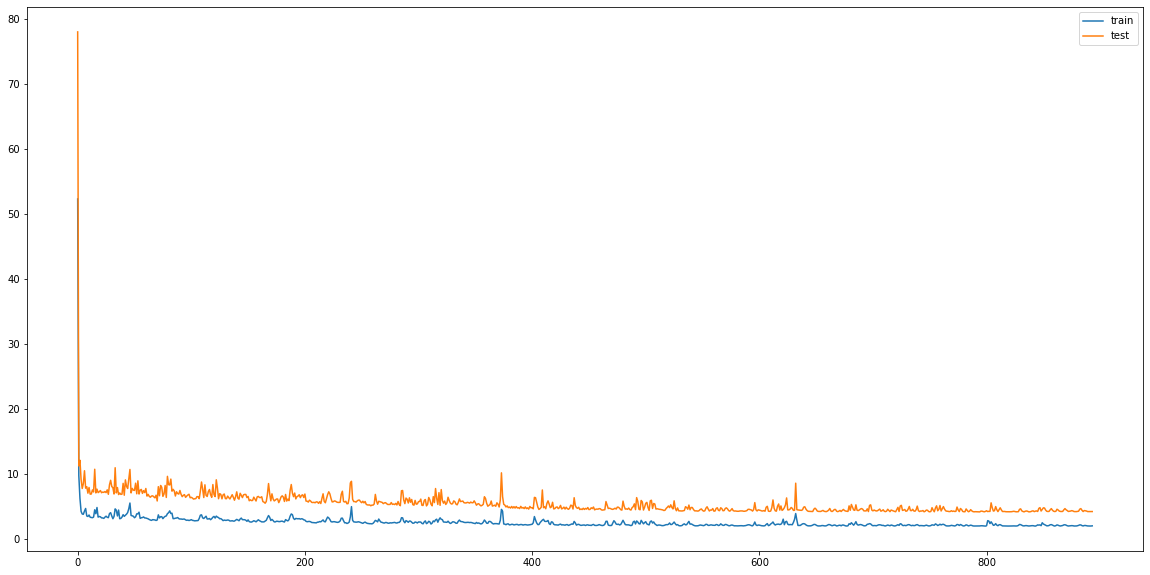

MSE : 38.80746263813895 
RMSE: 6.229563599333339 
NMSE: 0.03060458658478673 
DS  : 0.4993426899038638 
WDS : 0.0024531696875650395 
Ns  : 370


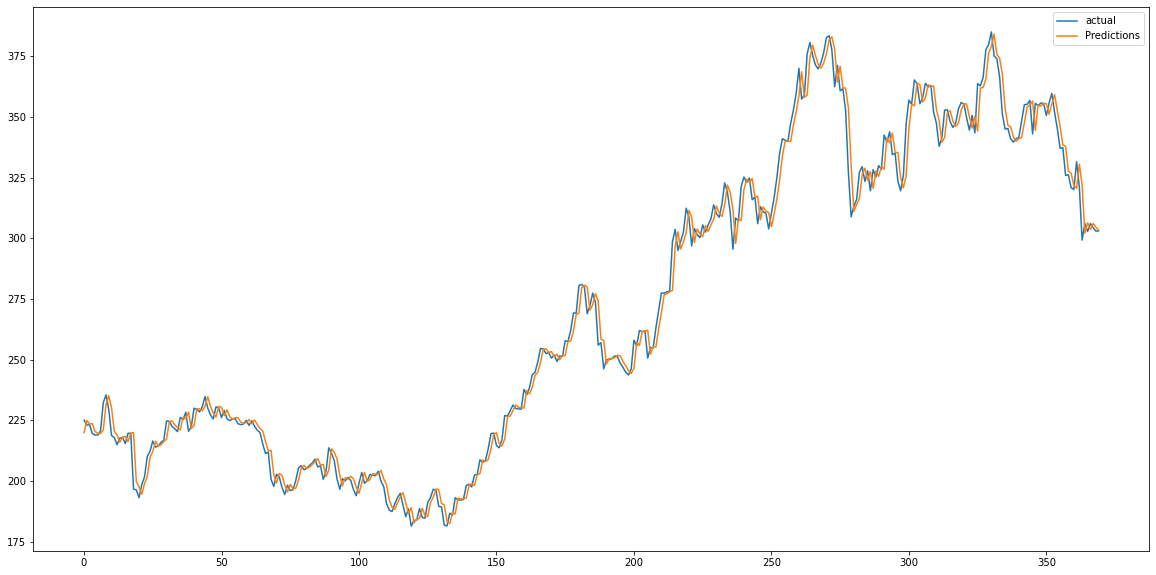

In [7]:
plotCompare(history.history['loss'],history.history['val_loss'],["train","test"])
printResults(testY, predictions,True)

In [8]:
# dropouts=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# for dropout in dropouts:
#     for dropout2 in dropouts:
#         h1=100000000
#         for h in history.history['val_loss']:
#             if h<h1:
#                 h1=h
#         print(dropout,dropout2,h1)
#         plt.plot(Y_test, label='Y')
#         plt.plot(predictions, label='P')
#         plt.legend()
#         plt.show()

In [9]:
# # from sklearn.linear_model import LogisticRegression
# # clf = LogisticRegression(random_state=0).fit(stockData[["Close"]][:100], stockData[["difference"]][:100])
# # p=clf.predict(stockData[["Close"]][101:])
# # c=0
# # for i in range(p.size):
# #     print(p[i],'-',stockData[["difference"]].iloc[i].values)
# #     if(p[i]==stockData[["difference"]].iloc[i].values):
        
# #         c+=1
# # print(c/p.size)
# xxxx=xxxx.reshape(xxxx.shape[0],xxxx.shape[1],1)
# model = Sequential()
# model.add(Dense(12,input_shape=(xxxx.shape[1], xxxx.shape[2]), activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# history=model.fit(X_train, Y_train, epochs=2000, batch_size=72, verbose=0, shuffle=True,
#                             validation_data=(X_test, Y_test), callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=100)])
# predictions=model.predict(X_test)
# # plot history
# plt.figure(figsize=(20,10))
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.show()
# plt.plot(Y_test, label='Y')
# plt.plot(predictions.reshape(predictions.shape[0],predictions.shape[1]), label='P')
# plt.show()
# print(history.history['val_loss'][-1])

In [10]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(Y_test, predictions.reshape(predictions.shape[0],predictions.shape[1]), squared=False)

In [11]:
# predictions.reshape(predictions.shape[0],predictions.shape[1])

In [12]:
# predictions

In [13]:
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# encoded = MaxPooling2D((2, 2), padding='same')(x)
# //At this point the representation is (7, 7, 32)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# autoencoder = Model(input_img, decoded)
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# autoencoder.fit(x_train_noisy, x_train,
# epochs=100,
# batch_size=128,
# shuffle=True,
# validation_data=(x_test_noisy, x_test),
# )

In [14]:
timeSteps=xxxx.shape[1]
variables=xxxx.shape[2]
inputshape=(timeSteps,variables)
model = keras.Sequential()
model.add(keras.Input(shape=inputshape))
model.add(Embedding(5, 2, input_length=5))
# model.add(layers.MultiHeadAttention())
model.add(Lambda(lambda x: print(x)))#positonal encoding
# model.build()
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


IndexError: tuple index out of range

In [ ]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner

In [1]:
!pip install  astroid
!pip install  bitarray
!pip install  bokeh
!pip install  certifi
!pip install  chardet
!pip install  coverage
!pip install  cryptography
!pip install  fsspec
!pip install  gast
!pip install  gevent
!pip install  grpcio
!pip install  h5py
!pip install  idna
!pip install  imagecodecs
!pip install  importlib-metadata
!pip install  ipykernel
!pip install  ipython
!pip install  jedi
!pip install  jupyter-client
!pip install  jupyterlab
!pip install  jupyterlab-server
!pip install  keyring
!pip install  llvmlite
!pip install  mpmath
!pip install  numba
!pip install  numpy
!pip install  parso
!pip install  pathspec
!pip install  prompt-toolkit
!pip install  pylint
!pip install  pyodbc
!pip install  pywin32
!pip install  pyzmq
!pip install  QtAwesome
!pip install  Rtree
!pip install  ruamel-yaml
!pip install  scikit-image
!pip install  scipy
!pip install  setuptools
!pip install  singledispatch
!pip install  sip
!pip install  spyder
!pip install  tensorboard-plugin-wit
!pip install  tifffile
!pip install  toml
!pip install  tqdm
!pip install  watchdog
!pip install  xlwings   
!pip install  tensorflow
!pip install  cudnn
!pip install  CUDA 
!pip install  tensorflow
!pip install  tensorflow-estimator
!pip install  tensorboard 
!pip install  tensorboard-plugin-wit
!pip install  pip
!pip install nvidia-pyindex
!pip install  cudnn
# !pip install tensorflow==2.4.0
!pip install  keras
!pip install --upgrade  astroid
!pip install --upgrade  bitarray
!pip install --upgrade  bokeh
!pip install --upgrade  certifi
!pip install --upgrade  chardet
!pip install --upgrade  coverage
!pip install --upgrade  cryptography
!pip install --upgrade  fsspec
!pip install --upgrade  gast
!pip install --upgrade  gevent
!pip install --upgrade  grpcio
!pip install --upgrade  h5py
!pip install --upgrade  idna
!pip install --upgrade  imagecodecs
!pip install --upgrade  importlib-metadata
!pip install --upgrade  ipykernel
!pip install --upgrade  ipython
!pip install --upgrade  jedi
!pip install --upgrade  jupyter-client
!pip install --upgrade  jupyterlab
!pip install --upgrade  jupyterlab-server
!pip install --upgrade  keyring
!pip install --upgrade  llvmlite
!pip install --upgrade  mpmath
!pip install --upgrade  numba
!pip install --upgrade  numpy
!pip install --upgrade  parso
!pip install --upgrade  pathspec
!pip install --upgrade  prompt-toolkit
!pip install --upgrade  pylint
!pip install --upgrade  pyodbc
!pip install --upgrade  pywin32
!pip install --upgrade  pyzmq
!pip install --upgrade  QtAwesome
!pip install --upgrade  Rtree
!pip install --upgrade  ruamel-yaml
!pip install --upgrade  scikit-image
!pip install --upgrade  scipy
!pip install --upgrade  setuptools
!pip install --upgrade  singledispatch
!pip install --upgrade  sip
!pip install --upgrade  spyder
!pip install --upgrade  tensorboard-plugin-wit
!pip install --upgrade  tifffile
!pip install --upgrade  toml
!pip install --upgrade  tqdm
!pip install --upgrade  watchdog
!pip install --upgrade  xlwings   
!pip install --upgrade  tensorflow
!pip install --upgrade  cudnn
!pip install --upgrade  CUDA 
!pip install --upgrade  tensorflow
!pip install --upgrade  tensorflow-estimator
!pip install --upgrade  tensorboard 
!pip install --upgrade  tensorboard-plugin-wit
!pip install --upgrade  pip
!pip install nvidia-pyindex
!pip install --upgrade  cudnn
# !pip install tensorflow==2.4.0
!pip install --upgrade  keras
!pip install --upgrade --user astroid
!pip install --upgrade --user bitarray
!pip install --upgrade --user bokeh
!pip install --upgrade --user certifi
!pip install --upgrade --user chardet
!pip install --upgrade --user coverage
!pip install --upgrade --user cryptography
!pip install --upgrade --user fsspec
!pip install --upgrade --user gast
!pip install --upgrade --user gevent
!pip install --upgrade --user grpcio
!pip install --upgrade --user h5py
!pip install --upgrade --user idna
!pip install --upgrade --user imagecodecs
!pip install --upgrade --user importlib-metadata
!pip install --upgrade --user ipykernel
!pip install --upgrade --user ipython
!pip install --upgrade --user jedi
!pip install --upgrade --user jupyter-client
!pip install --upgrade --user jupyterlab
!pip install --upgrade --user jupyterlab-server
!pip install --upgrade --user keyring
!pip install --upgrade --user llvmlite
!pip install --upgrade --user mpmath
!pip install --upgrade --user numba
!pip install --upgrade --user numpy
!pip install --upgrade --user parso
!pip install --upgrade --user pathspec
!pip install --upgrade --user prompt-toolkit
!pip install --upgrade --user pylint
!pip install --upgrade --user pyodbc
!pip install --upgrade --user pywin32
!pip install --upgrade --user pyzmq
!pip install --upgrade --user QtAwesome
!pip install --upgrade --user Rtree
!pip install --upgrade --user ruamel-yaml
!pip install --upgrade --user scikit-image
!pip install --upgrade --user scipy
!pip install --upgrade --user setuptools
!pip install --upgrade --user singledispatch
!pip install --upgrade --user sip
!pip install --upgrade --user spyder
!pip install --upgrade --user tensorboard-plugin-wit
!pip install --upgrade --user tifffile
!pip install --upgrade --user toml
!pip install --upgrade --user tqdm
!pip install --upgrade --user watchdog
!pip install --upgrade --user xlwings   
!pip install --upgrade --user tensorflow
!pip install --upgrade --user cudnn
!pip install --upgrade --user CUDA 
!pip install --upgrade --user tensorflow
!pip install --upgrade --user tensorflow-estimator
!pip install --upgrade --user tensorboard 
!pip install --upgrade --user tensorboard-plugin-wit
!pip install --upgrade --user pip
# !pip install nvidia-pyindex
!pip install --upgrade --user cudnn
# !pip install tensorflow==2.4.0
!pip install --upgrade --user keras


  Using cached ruamel.yaml.clib-0.2.2-cp38-cp38-win_amd64.whl (120 kB)
  Using cached watchdog-1.0.2-py3-none-win_amd64.whl (72 kB)


  Using cached flake8-3.8.4-py2.py3-none-any.whl (72 kB)
  Using cached helpdev-0.7.1-py3-none-any.whl (14 kB)
  Using cached autopep8-1.5.5-py2.py3-none-any.whl (44 kB)
  Attempting uninstall: flake8
    Found existing installation: flake8 3.9.0
    Uninstalling flake8-3.9.0:
      Successfully uninstalled flake8-3.9.0
  Attempting uninstall: autopep8
    Found existing installation: autopep8 1.5.6
    Uninstalling autopep8-1.5.6:
      Successfully uninstalled autopep8-1.5.6
  Attempting uninstall: watchdog
    Found existing installation: watchdog 2.0.2
    Uninstalling watchdog-2.0.2:
      Successfully uninstalled watchdog-2.0.2
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.4.1 requires absl-py>=0.4, which is not installed.
tensorboard 2.4.1 requires google-auth<2,>=1.6.3, which is not installed.
tensorboard 2.4.1 requires google-auth-oauthlib<0.5,>=0.4.1, which is not installed.
tensorboard 2.4.1 requires markdown>=2.6.8, which is not installed.
tensorboard 2.4.1 requires protobuf>=3.6.0, which is not installed.


  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached protobuf-3.15.6-py2.py3-none-any.whl (173 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.3-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-4.2.1-py3-none-any.whl (12 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)


ERROR: Could not find a version that satisfies the requirement cudnn
ERROR: No matching distribution found for cudnn


  Using cached nvidia-pyindex-1.0.6.tar.gz (6.7 kB)
  Using cached nvidia-pyindex-1.0.5.tar.gz (6.1 kB)
  Running setup.py clean for nvidia-pyindex
Failed to build nvidia-pyindex
    Running setup.py install for nvidia-pyindex: started
    Running setup.py install for nvidia-pyindex: finished with status 'error'


    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\mech\\AppData\\Local\\Temp\\pip-install-j__be_xa\\nvidia-pyindex_48cacf99cccf40f1a8f73c09513e195b\\setup.py'"'"'; __file__='"'"'C:\\Users\\mech\\AppData\\Local\\Temp\\pip-install-j__be_xa\\nvidia-pyindex_48cacf99cccf40f1a8f73c09513e195b\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\mech\AppData\Local\Temp\pip-pip-egg-info-enp06jdf'
         cwd: C:\Users\mech\AppData\Local\Temp\pip-install-j__be_xa\nvidia-pyindex_48cacf99cccf40f1a8f73c09513e195b\
    Complete output (6 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\mech\AppData\Local\Temp\pip-install-j__be_xa\nvidia-pyindex_48cacf99cccf40f1a8f73c09

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Created wheel for bitarray: filename=bitarray-1.8.1-cp38-cp38-win_amd64.whl size=69815 sha256=759103f7d570ce433ad1607db0ec5ba0755741cf4931edf240b9e54ee191e4c7
  Stored in directory: c:\users\mech\appdata\local\pip\cache\wheels\27\b8\97\bd9f0dcda38d0d7f8cc32174af9ebbf12e60f60ba20309c1a3
Successfully built bitarray
  Attempting uninstall: bitarray
    Found existing installation: bitarray 1.8.0
    Uninstalling bitarray-1.8.0:
      Successfully uninstalled bitarray-1.8.0
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
-ensorflow-gpu 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.


  Using cached grpcio-1.36.1-cp38-cp38-win_amd64.whl (3.0 MB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
-ensorflow-gpu 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
-ensorflow-gpu 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.36.1 which is incompatible.
tensorflow 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.36.1 which is incompatible.


  Using cached h5py-3.2.1-cp38-cp38-win_amd64.whl (2.8 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
-ensorflow-gpu 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
-ensorflow-gpu 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.36.1 which is incompatible.
-ensorflow-gpu 2.4.1 requires h5py~=2.10.0, but you have h5py 3.2.1 which is incompatible.
tensorflow 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.36.1 which is incompatible.
tensorflow 2.4.1 requires h5py~=2.10.0, but you have h5py 3.2.1 which is incompatible.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.25.1 requires idna<3,>=2.5, but you have idna 3.1 which is incompatible.



  Using cached idna-3.1-py3-none-any.whl (58 kB)
  Attempting uninstall: idna
    Found existing installation: idna 2.10
    Uninstalling idna-2.10:
      Successfully uninstalled idna-2.10
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.7.3
    Uninstalling importlib-metadata-3.7.3:
      Successfully uninstalled importlib-metadata-3.7.3
  Attempting uninstall: ipython
    Found existing installation: ipython 7.21.0
    Uninstalling ipython-7.21.0:
      Successfully uninstalled ipython-7.21.0
  Using cached jedi-0.18.0-py2.py3-none-any.whl (1.4 MB)
  Using cached parso-0.8.1-py2.py3-none-any.whl (93 kB)
  Attempting uninstall: parso
    Found existing installation: parso 0.7.0
    Uninstalling parso-0.7.0:
      Successfully uninstalled parso-0.7.0
  Attempting uninstall: jedi
    Found existing installation: jedi 0.17.2
    Uninstalling jedi-0.17.2:
      Successfully uninstalled jedi-0.17.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.3 requires jedi==0.17.2, but you have jedi 0.18.0 which is incompatible.
spyder 4.2.3 requires parso==0.7.0, but you have parso 0.8.1 which is incompatible.
python-language-server 0.36.2 requires jedi<0.18.0,>=0.17.2, but you have jedi 0.18.0 which is incompatible.


  Using cached jupyter_client-6.1.12-py3-none-any.whl (112 kB)
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.7
    Uninstalling jupyter-client-6.1.7:
      Successfully uninstalled jupyter-client-6.1.7
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Attempting uninstall: idna
    Found existing installation: idna 3.1
    Uninstalling idna-3.1:
      Successfully uninstalled idna-3.1
  Attempting uninstall: jupyterlab
    Found existing installation: jupyterlab 3.0.11
    Uninstalling jupyterlab-3.0.11:
      Successfully uninstalled jupyterlab-3.0.11


  Attempting uninstall: keyring
    Found existing installation: keyring 22.3.0
    Uninstalling keyring-22.3.0:
      Successfully uninstalled keyring-22.3.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.3 requires jedi==0.17.2, but you have jedi 0.18.0 which is incompatible.
spyder 4.2.3 requires parso==0.7.0, but you have parso 0.8.1 which is incompatible.


  Attempting uninstall: numba
    Found existing installation: numba 0.53.0
    Uninstalling numba-0.53.0:
      Successfully uninstalled numba-0.53.0
  Using cached numpy-1.20.1-cp38-cp38-win_amd64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mech\\AppData\\Roaming\\Python\\Python38\\site-packages\\~1mpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Using cached pathspec-0.8.1-py2.py3-none-any.whl (28 kB)
  Attempting uninstall: pathspec
    Found existing installation: pathspec 0.7.0
    Uninstalling pathspec-0.7.0:
      Successfully uninstalled pathspec-0.7.0
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 3.0.17
    Uninstalling prompt-toolkit-3.0.17:
      Successfully uninstalled prompt-toolkit-3.0.17
  Using cached pyodbc-4.0.30-cp38-cp38-win_amd64.whl (68 kB)
  Attempting uninstall: pyodbc
    Found existing installation: pyodbc 4.0.0-unsupported
    Uninstalling pyodbc-4.0.0-unsupported:
      Successfully uninstalled pyodbc-4.0.0-unsupported
  Using cached pyzmq-22.0.3-cp38-cp38-win_amd64.whl (1.2 MB)
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 20.0.0
    Uninstalling pyzmq-20.0.0:
      Successfully uninstalled pyzmq-20.0.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\zmq\\~ackend\\cython\\constants.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached Rtree-0.9.7-cp38-cp38-win_amd64.whl (424 kB)
  Attempting uninstall: Rtree
    Found existing installation: Rtree 0.9.4
    Uninstalling Rtree-0.9.4:
      Successfully uninstalled Rtree-0.9.4
  Attempting uninstall: ruamel-yaml
    Found existing installation: ruamel.yaml 0.16.13
    Uninstalling ruamel.yaml-0.16.13:
      Successfully uninstalled ruamel.yaml-0.16.13
  Using cached scikit_image-0.18.1-cp38-cp38-win_amd64.whl (12.2 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.17.2
    Uninstalling scikit-image-0.17.2:
      Successfully uninstalled scikit-image-0.17.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.3 requires jedi==0.17.2, but you have jedi 0.18.0 which is incompatible.
spyder 4.2.3 requires parso==0.7.0, but you have parso 0.8.1 which is incompatible.
tensorflow 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.36.1 which is incompatible.
tensorflow 2.4.1 requires h5py~=2.10.0, but you have h5py 3.2.1 which is incompatible.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.20.1 which is incompatible.



  Attempting uninstall: setuptools
    Found existing installation: setuptools 52.0.0.post20210125
    Uninstalling setuptools-52.0.0.post20210125:
      Successfully uninstalled setuptools-52.0.0.post20210125
  Using cached sip-6.0.3-cp38-cp38-win_amd64.whl (610 kB)
  Attempting uninstall: sip
    Found existing installation: sip 4.19.13
    Uninstalling sip-4.19.13:
      Successfully uninstalled sip-4.19.13
  Using cached jedi-0.17.2-py2.py3-none-any.whl (1.4 MB)
  Using cached parso-0.7.0-py2.py3-none-any.whl (100 kB)
  Attempting uninstall: parso
    Found existing installation: parso 0.8.1
    Uninstalling parso-0.8.1:
      Successfully uninstalled parso-0.8.1
  Attempting uninstall: jedi
    Found existing installation: jedi 0.18.0
    Uninstalling jedi-0.18.0:
      Successfully uninstalled jedi-0.18.0
  Attempting uninstall: spyder
    Found existing installation: spyder 4.2.3
    Uninstalling spyder-4.2.3:
      Successfully uninstalled spyder-4.2.3


  Attempting uninstall: tifffile
    Found existing installation: tifffile 2020.10.1
    Uninstalling tifffile-2020.10.1:
      Successfully uninstalled tifffile-2020.10.1
  Using cached watchdog-2.0.2-py3-none-win_amd64.whl (74 kB)
  Attempting uninstall: watchdog
    Found existing installation: watchdog 1.0.2
    Uninstalling watchdog-1.0.2:
      Successfully uninstalled watchdog-1.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires watchdog<2.0.0,>=0.10.3, but you have watchdog 2.0.2 which is incompatible.


  Using cached h5py-2.10.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.36.1
    Uninstalling grpcio-1.36.1:
      Successfully uninstalled grpcio-1.36.1
  Attempting uninstall: h5py
    Found existing installation: h5py 3.2.1
    Uninstalling h5py-3.2.1:
      Successfully uninstalled h5py-3.2.1
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0


ERROR: Could not find a version that satisfies the requirement cudnn
ERROR: No matching distribution found for cudnn


  Using cached nvidia-pyindex-1.0.6.tar.gz (6.7 kB)
  Using cached nvidia-pyindex-1.0.5.tar.gz (6.1 kB)
  Running setup.py clean for nvidia-pyindex
Failed to build nvidia-pyindex
    Running setup.py install for nvidia-pyindex: started
    Running setup.py install for nvidia-pyindex: finished with status 'error'


    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\mech\\AppData\\Local\\Temp\\pip-install-zazeeppp\\nvidia-pyindex_d2a08400926b41ca96533c09a45a2ba6\\setup.py'"'"'; __file__='"'"'C:\\Users\\mech\\AppData\\Local\\Temp\\pip-install-zazeeppp\\nvidia-pyindex_d2a08400926b41ca96533c09a45a2ba6\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\mech\AppData\Local\Temp\pip-pip-egg-info-36p4pqdy'
         cwd: C:\Users\mech\AppData\Local\Temp\pip-install-zazeeppp\nvidia-pyindex_d2a08400926b41ca96533c09a45a2ba6\
    Complete output (6 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\mech\AppData\Local\Temp\pip-install-zazeeppp\nvidia-pyindex_d2a08400926b41ca96533c09

  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
-ensorflow-gpu 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.


  Using cached grpcio-1.36.1-cp38-cp38-win_amd64.whl (3.0 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
-ensorflow-gpu 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
-ensorflow-gpu 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.36.1 which is incompatible.
tensorflow 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.36.1 which is incompatible.


  Using cached h5py-3.2.1-cp38-cp38-win_amd64.whl (2.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
-ensorflow-gpu 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
-ensorflow-gpu 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.36.1 which is incompatible.
-ensorflow-gpu 2.4.1 requires h5py~=2.10.0, but you have h5py 3.2.1 which is incompatible.
tensorflow 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.36.1 which is incompatible.
tensorflow 2.4.1 requires h5py~=2.10.0, but you have h5py 3.2.1 which is incompatible.


  Using cached idna-3.1-py3-none-any.whl (58 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.25.1 requires idna<3,>=2.5, but you have idna 3.1 which is incompatible.


  Using cached jedi-0.18.0-py2.py3-none-any.whl (1.4 MB)
  Using cached parso-0.8.1-py2.py3-none-any.whl (93 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires jedi==0.17.2, but you have jedi 0.18.0 which is incompatible.
spyder 4.2.5 requires parso==0.7.0, but you have parso 0.8.1 which is incompatible.
spyder 4.2.5 requires watchdog<2.0.0,>=0.10.3, but you have watchdog 2.0.2 which is incompatible.
python-language-server 0.36.2 requires jedi<0.18.0,>=0.17.2, but you have jedi 0.18.0 which is incompatible.


  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Attempting uninstall: idna
    Found existing installation: idna 3.1
    Uninstalling idna-3.1:
      Successfully uninstalled idna-3.1


  Using cached numpy-1.20.1-cp38-cp38-win_amd64.whl (13.7 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
-ensorflow-gpu 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
-ensorflow-gpu 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.36.1 which is incompatible.
-ensorflow-gpu 2.4.1 requires h5py~=2.10.0, but you have h5py 3.2.1 which is incompatible.
-ensorflow-gpu 2.4.1 requires numpy~=1.19.2, but you have numpy 1.20.1 which is incompatible.
tensorflow 2.4.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.36.1 which is incompatible.
tensorflow 2.4.1 requires h5py~=2.10.0, but you have h5py 3.2.1 which is incompatible.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.20.1 which 

  Using cached ruamel.yaml-0.17.0-py2.py3-none-any.whl (101 kB)
  Attempting uninstall: ruamel-yaml
    Found existing installation: ruamel.yaml 0.16.12
    Uninstalling ruamel.yaml-0.16.12:
      Successfully uninstalled ruamel.yaml-0.16.12

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached jedi-0.17.2-py2.py3-none-any.whl (1.4 MB)
  Using cached watchdog-1.0.2-py3-none-win_amd64.whl (72 kB)
  Using cached parso-0.7.0-py2.py3-none-any.whl (100 kB)
  Attempting uninstall: parso
    Found existing installation: parso 0.8.1
    Uninstalling parso-0.8.1:
      Successfully uninstalled parso-0.8.1
  Attempting uninstall: jedi
    Found existing installation: jedi 0.18.0
    Uninstalling jedi-0.18.0:
      Successfully uninstalled jedi-0.18.0


  Using cached watchdog-2.0.2-py3-none-win_amd64.whl (74 kB)
  Attempting uninstall: watchdog
    Found existing installation: watchdog 1.0.2
    Uninstalling watchdog-1.0.2:
      Successfully uninstalled watchdog-1.0.2


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires watchdog<2.0.0,>=0.10.3, but you have watchdog 2.0.2 which is incompatible.


  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached h5py-2.10.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.36.1
    Uninstalling grpcio-1.36.1:
      Successfully uninstalled grpcio-1.36.1
  Attempting uninstall: h5py
    Found existing installation: h5py 3.2.1
    Uninstalling h5py-3.2.1:
      Successfully uninstalled h5py-3.2.1
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not find a version that satisfies the requirement cudnn
ERROR: No matching distribution found for cudnn


ERROR: Could not find a version that satisfies the requirement cudnn
ERROR: No matching distribution found for cudnn


In [3]:
!conda install -c anaconda cudnn

^C


In [4]:
!conda update --all

^C


In [1]:
import subprocess as sbp
import pip
pkgs = eval(str(sbp.run("pip3 list -o --format=json", shell=True,
                         stdout=sbp.PIPE).stdout, encoding='utf-8'))
for pkg in pkgs:
    sbp.run("pip3 install --upgrade " + pkg['name'], shell=True)

In [9]:
conda update --all

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
